# Bar Graph Visualization
Course: DS2023

**Rachel Seo ydp7xv** 

### Set up environment

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Dataset for Problem #1:    

In [3]:
data = {
    'Country': ['U.S.', 'Germany', 'Japan', 'France', 'U.K.', 'Spain', 'Argentina', 'Brazil', 'Peru', 'Lebanon', 'Indonesia', 'Ukraine', 'Morocco', 'Bangladesh', 'Nigeria', 'India', 'Kenya', 'Cameroon', 'Zimbabwe', 'Ethiopia', 'Mali'],
    'Education': [20, 48, 10, 28, 18, 27, 51, 55, 60, 35, 29, 30, 33, 40, 28, 55, 26, 27, 29, 47, 50],
    'Hard work': [30, 18, 52, 28, 30, 40, 24, 26, 24, 20, 55, 26, 29, 25, 27, 25, 48, 28, 58, 42, 25],
    'Family wealth or connections': [30, 10, 20, 18, 27, 10, 12, 8, 5, 22, 17, 3, 14, 3, 22, 5, 20, 28, 10, 4, 15],
    'All, none or other': [10, 20, 18, 23, 18, 18, 5, 4, 2, 20, 5, 10, 15, 27, 15, 12, 5, 8, 1, 8, 10],
    'gni_per_capita': [65000, 48000, 42000, 41000, 40000, 32000, 20000, 15000, 13000, 12000, 11000, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 500]
}

df = pd.DataFrame(data)

Basic Stacked Bar Graph


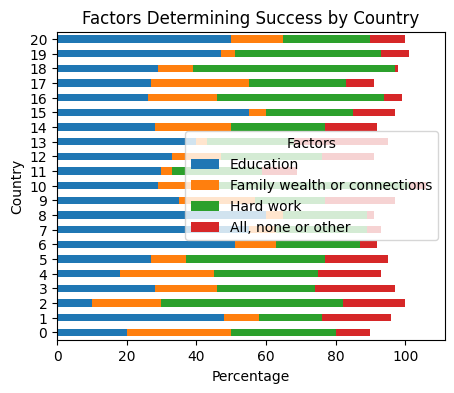

In [4]:
# Plot the horizontal stacked bar graph
ax = df[['Education', 'Family wealth or connections', 'Hard work', 'All, none or other']].plot(kind='barh', stacked=True, figsize=(5, 4))

# Set the title and labels
ax.set_title('Factors Determining Success by Country')
ax.set_xlabel('Percentage')
ax.set_ylabel('Country')

# Display the legend
ax.legend(title='Factors')

# Show the plot
plt.show()

In this Markdown cell, list the changes that need to be made to the default stacked bar graph to make it look like the one above.   
Note why the change should be made.   

1) Reorder the countries based on gross national income per capita. This will add logic to the y-axis ordering. 
2) Create a new figure with a specific size. This will allow subplots to all be on one plot.
3) Create a horizontal bar chart for each of the factors. There are 4 different plots. 
4) In each bar chart:
    - Sort the x-axis to be in increments of 25%. This will allow the removal for the 'Percentage' label.
    - Create vertical white lines at each percentage tick mark. This will help the reader to visually break down the bar graph values from the given percentage scale.

5) Set the suptitle as "What Young People Think is the Most Important Factor in Determining Success". This gives context to what data we are looking at.
6) Set the subtitle as "How 15-to-24-year-olds in each country responded" - to clarify who the "young people" are specifically.
7) Change the width of the latter two factors. Young people in the dataset do not hold as much importance for these, so we are efficiently saving space.
8) Create gray gridlines separating the bar graph values throughout the whole graph. This will allow for a more cohesive and connected look.
9) Add notes along the bottom of the graph - as we need to give credit to where the data is from.


Improved graph below

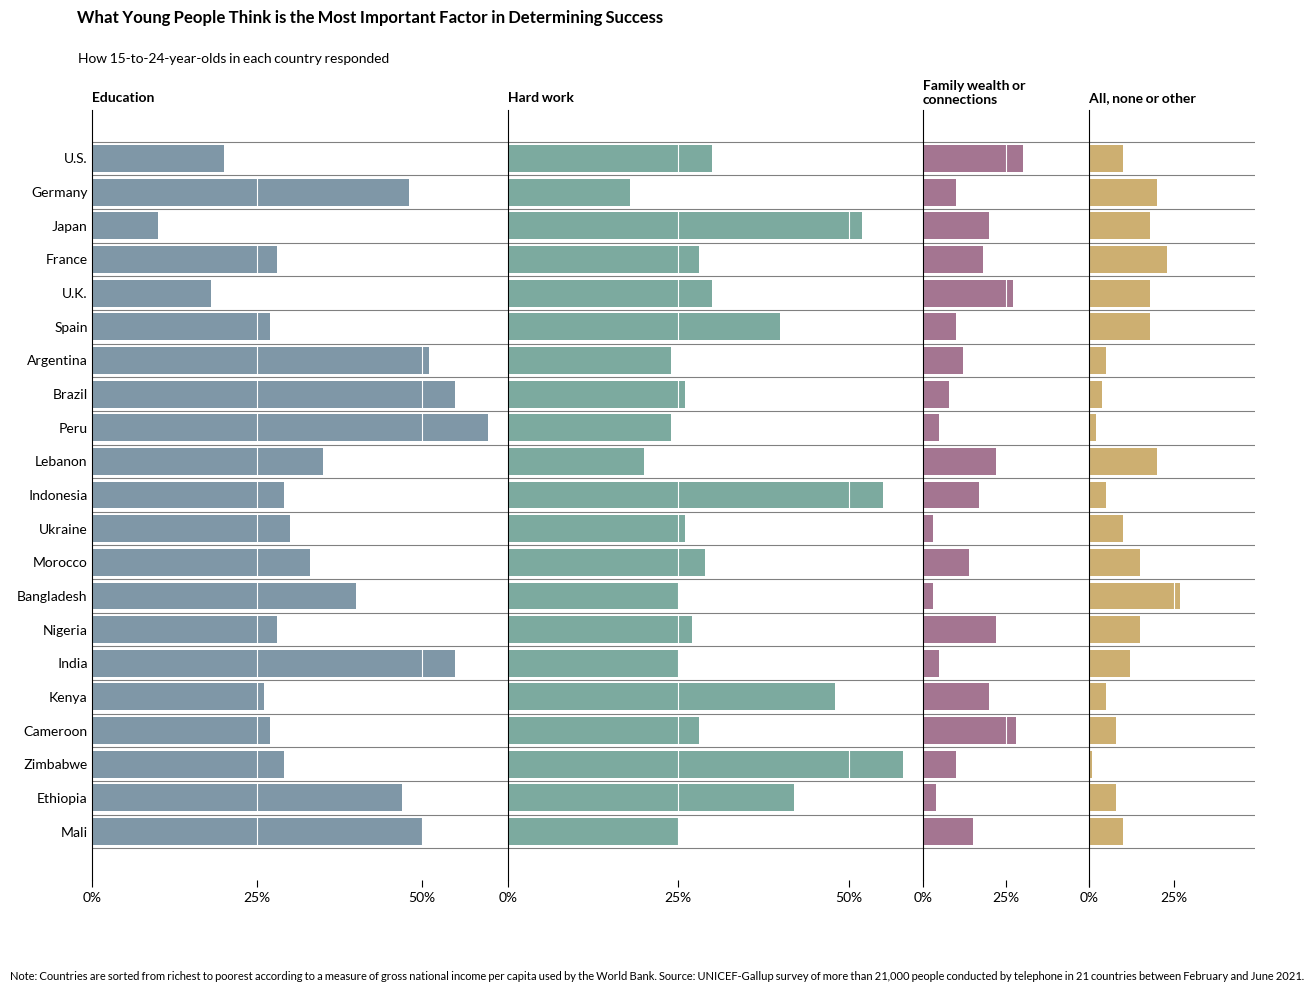

In [7]:
# reorder the data frame by gni_per_capita
df_sorted = df.sort_values(by='gni_per_capita', ascending=True).reset_index(drop=True)

# font
plt.rcParams['font.family'] = 'Lato'

# new figure with a specific sizes
fig, axs = plt.subplots(1, 4, gridspec_kw={'width_ratios': [2.5, 2.5, 1, 1]}, figsize=(15, 10), sharey=True, sharex=False)

# grey gridlines in minor tick lines
for ax in axs:
    ax.set_yticks(np.arange(-0.5, 21, 0.5), minor=True)
    ax.grid(which='minor', linestyle='-', color='gray')

# x-axis
x_ticks = [0, 25, 50]
x_ticks_labels = ['0%', '25%', '50%']

# suptitle and title
plt.suptitle('What Young People Think is the Most Important Factor in Determining Success', x=0.31, weight='bold')
plt.title('How 15-to-24-year-olds in each country responded', x=-5.15, size=10, pad=1, y=1.05)

# horizontal bar chart for Education 
axs[0].barh(df_sorted['Country'], df_sorted['Education'], color='#7f97a7', zorder=1)
axs[0].set_title('Education', loc='left', weight='bold', color='black', size=10)
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_ticks_labels)
axs[0].grid(axis='x', linestyle='-', color='white', which='major', zorder=2) # vertical gridlines
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', which='both', length=5)
axs[0].tick_params(axis='y', which='both', length=0)

# horizontal bar chart for Hard work
axs[1].barh(df_sorted['Country'], df_sorted['Hard work'], color='#7caa9f', zorder=1)
axs[1].set_title('Hard work', loc='left', weight='bold', color='black', size=10)
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_ticks_labels)
axs[1].grid(axis='x', linestyle='-', color='white', which='major', zorder=2) # vertical gridlines
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].tick_params(axis='x', which='both', length=5)
axs[1].tick_params(axis='y', which='both', length=0)

# horizontal bar chart for family wealth or connections
axs[2].barh(df_sorted['Country'], df_sorted['Family wealth or connections'], color='#a47591', zorder=1)
axs[2].set_title('Family wealth or\nconnections', loc='left', weight='bold', color='black', size=10, wrap=True)
axs[2].set_xlim(0, 25)
axs[2].set_xticks(x_ticks)
axs[2].set_xticklabels(x_ticks_labels[:-1] + [' '])
axs[2].grid(axis='x', linestyle='-', color='white', which='major', zorder=2) # vertical gridlines
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].tick_params(axis='x', which='both', length=5)
axs[2].tick_params(axis='y', which='both', length=0)

# horizontal bar chart for All, none or other
axs[3].barh(df_sorted['Country'], df_sorted['All, none or other'], color='#cdaf71', zorder=1)
axs[3].set_title('All, none or other', loc='left', weight='bold', color='black', size = 10)
axs[3].set_xticks(x_ticks)
axs[3].set_xticklabels(x_ticks_labels[:-1] + [' '])
axs[3].grid(axis='x', linestyle='-', color='white', which='major', zorder=2) # vertical gridlines
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)
axs[3].tick_params(axis='x', which='both', length=5)
axs[3].tick_params(axis='y', which='both', length=0)
axs[3].set_xlim(0, 49)

# add notes
fig.text(0.07, 0.01, """Note: Countries are sorted from richest to poorest according to a measure of gross national income per capita used by the World Bank. Source: UNICEF-Gallup survey of more than 21,000 people conducted by telephone in 21 countries between February and June 2021.""", size=8)

plt.subplots_adjust(wspace=0) # removes spaces in between the subplots
plt.show()


Dataset for Problem #2:

In [244]:
data = {
    "Term Start": [1917, 1919, 1921, 1923, 1925, 1927, 1929, 1931, 1933, 1935, 1937, 1939, 1941, 1943, 1945, 1947, 1949, 1951, 1953, 1955, 1957, 1959, 1961, 1963, 1965, 1967, 1969, 1971, 1973, 1975, 1977, 1979, 1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017],
    "Term End": [1919, 1921, 1923, 1925, 1927, 1929, 1931, 1933, 1935, 1937, 1939, 1941, 1943, 1945, 1947, 1949, 1951, 1953, 1955, 1957, 1959, 1961, 1963, 1965, 1967, 1969, 1971, 1973, 1975, 1977, 1979, 1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019],
    "Women Representatives": [1, 1, 4, 2, 3, 5, 9, 8, 8, 6, 6, 9, 9, 9, 10, 10, 9, 10, 11, 17, 16, 16, 17, 12, 11, 11, 10, 13, 16, 19, 18, 16, 22, 22, 23, 24, 29, 32, 48, 50, 55, 58, 60, 62, 66, 74, 77, 73, 79, 84, 89],
    "Total Representatives": [435] * 51
}

df1 = pd.DataFrame(data)

Build the bar graph below:

In [245]:
# create new column from 'Term Start' and 'Term End'
df1['Year'] = df1['Term Start'].astype(str) + '-' + df1['Term End'].astype(str)

# calculate percentage of women representatives from total representatives in each term
df1['Women Reps %'] = df1['Women Representatives'] / df1['Total Representatives'] * 100

df1.head()

,Term Start,Term End,Women Representatives,Total Representatives,Year,Women Reps %
0,1917,1919,1,435,1917-1919,0.229885
1,1919,1921,1,435,1919-1921,0.229885
2,1921,1923,4,435,1921-1923,0.919540
3,1923,1925,2,435,1923-1925,0.459770
4,1925,1927,3,435,1925-1927,0.689655


Text(0.1, 0.01, 'Source: Drew Desilver (2018)')

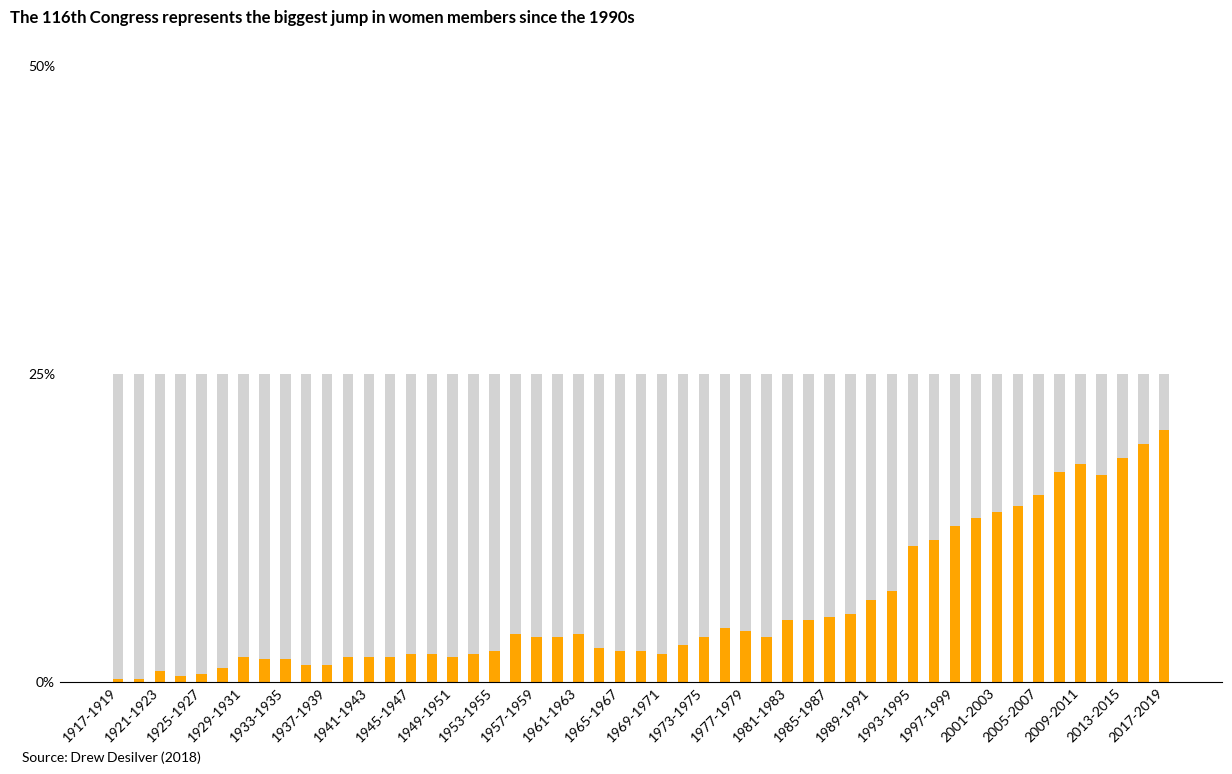

In [246]:
# creating new figure
plt.figure(figsize=(15, 8))

# font 
plt.rcParams['font.family'] = 'Lato'

# suptitle
plt.suptitle("The 116th Congress represents the biggest jump in women members since the 1990s", x=0.3, y=0.95, weight='bold')

# bar chart for grey bars
grey_bars = plt.bar(df1['Year'], 25, width=0.5, color='lightgrey')

# bar chart for Women Representatives
womens_rep = plt.bar(df1['Year'], df1['Women Reps %'], width=0.5, color='orange')

# x-axis labels (every other x-label is hidden)
plt.xticks(ticks=range(len(df1['Year'])), labels=[l if i % 2 == 0 else '' for i, l in enumerate(df1['Year'])], rotation=45, ha='right')

# y-axis labels
plt.yticks(ticks=range(0, 51, 25), labels=('0%', '25%', '50%'))

# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# remove tick lines
plt.gca().tick_params(axis='x', which='both', length=0)  # x-axis tick lines removed
plt.gca().tick_params(axis='y', which='both', length=0)  # y-axis tick lines removed

# add note
plt.figtext(0.1, 0.01, """Source: Drew Desilver (2018)""")


The scaffolding of the graph helps to tell a story (including subtext). 

Starting off with the title, it serves to turn our attention to the large increase in women members. This is then further emphasized by the difference in colors shown in the bar graph - the orange against the gray. On the x-axis are years flowing chronollogically and being labeled from left to right helps to tell this story in time order. The y-axis is labeled in percentages and this serves to show this perspective of how little women members there are in Congress both historically and in the present. The source is listed at the bottom left to show what year and where the data/graph orginated. 